# Para esta continuación, la idea es seguir trabajando desde Python e ir completando las tablas que se emplearon como practica del curso de PowerBi


## El metodo que se empleo en el cuadernillo anterior para generar las tablas e insertar los datos, no corresponde a la manera mas sencilla de hacerlo, de hecho, a continuación se muestran los pasos para realizar esto mismo desde la interfaz de PostgreSQL.


In [1]:
# algunas funciones utiles que se desarrollaron en el cuadernillo anterior
import psycopg2

def ejecutar(comando):
    conn = psycopg2.connect('dbname=curso_postgresql user=Tester password=123456')
    cur = conn.cursor()
    cur.execute(comando)
    conn.commit()
    cur.close()
    conn.close()
    
def mostrar_tabla(comando):
    conn = psycopg2.connect('dbname=curso_postgresql user=Tester password=123456')
    cur = conn.cursor()
    cur.execute(comando)
    rows = cur.fetchall()
    df = pd.DataFrame(rows)
    conn.commit()
    cur.close()
    conn.close()
    return df

## **¿Como importar archivos a PostgreSQL?**


**1) Desde el mismo administrador de PostgreSQL**

Lo primero que podemos hacer es ir a ver las tablas que creamos en el cuadernillo anterior.
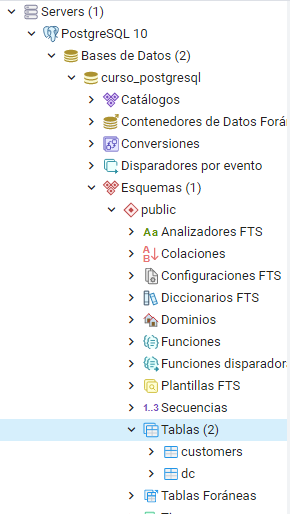

Ahora para importar un archivo, lo primero que debemos hacer es crear una tabla vacia (Recomendacion: Utilizar el mismo nombre del archivo)


In [11]:
# visualicemos las tablas que vamos a crear
import pandas as pd

Nombres_archivos = ['detergents', 'orders', 'plants', 'routes_available', 'routes_endtoend', 'routes_segment', 'variable_costs']
ruta_base = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/{}.csv'

for nombre in Nombres_archivos:
    ruta_archivo = ruta_base.format(nombre)
    archivo = pd.read_csv(ruta_archivo, sep = ';')
    df = pd.DataFrame(archivo)
    print(nombre, '\n')
    print(df.head(1), '\n')
    


detergents 

  DetergentID Composition  PurityPercentage    Packaging  NominalPricePerLiter
0      Det001         C71                90  crysta500cc                   766 

orders 

    OrderID ProductID   CustomerID  QuantityLiters
0  Order001    Det004  Customer001               9 

plants 

    PlantID PlantLocationLatitude PlantLocationLongitude  \
0  Plant001         6.795.458.019          3.095.143.418   

   PlantProdCapacityLiters  PlantRailTransportationCapacityLiters  \
0                      760                                    324   

   PlantRoadTransportationCapacityLiters  
0                                    362   

routes_available 

    RouteID StartRoute MiddleRoute     EndRoute  RailUse
0  Route001   Plant001       DC001  Customer001        0 

routes_endtoend 

      Start          End  EndToEndCostPerLiter
0  Plant001  Customer001                     9 

routes_segment 

  SegmentStart SegmentEnd SegmentMode  SegmentCostPerUnit
0     Plant001      DC001        

**Ahora que mas menos conocemos la estructura de las tablas podemos proseguir a crearlas.**

In [62]:
# Para crear las tablas

import numpy as np

## Primero creemos un comando de ejemplo
nombre_tabla = Nombres_archivos[-1]

## fijemonos en una columna de la tabla, por ejemplo la primera

encabezados = list(df.columns)
nombre_columna = encabezados[0]
tipo_dato = type(df[encabezados[0]][0])

lista = []

if tipo_dato == str:
    tipo_dato = 'varchar(20)'
elif tipo_dato == int:
    tipo_dato = 'int'
else:
    print('error')
    
lista.append((nombre_columna, tipo_dato))
parametro = ''
for i in lista:
    parametro += i[0] + ' ' + i[1] + ','

# remover la ultima ','
parametro = parametro[:-1]

prototipo_de_comando = 'create table {}({})'.format(nombre_tabla, parametro)
print(prototipo_de_comando)


create table variable_costs(PlantID varchar(20))


In [67]:
# ahora escribamos para una tabla cualquiera (recorrer solo las columnas)

nombre_tabla = Nombres_archivos[-1]
encabezados = list(df.columns)

lista = []

for columna in range(len(encabezados)):
    nombre_columna = encabezados[columna]
    tipo_dato = type(df[encabezados[columna]][0])

    if tipo_dato == str:
        tipo_dato = 'varchar(20)'
    elif tipo_dato == np.int64:
        tipo_dato = 'int'
    else:
        print('error')    
    lista.append((nombre_columna, tipo_dato))

parametro = ''
for i in lista:
    parametro += i[0] + ' ' + i[1] + ', '

# remover la ultima ','
parametro = parametro[:-2]

prototipo_de_comando = 'create table {}({})'.format(nombre_tabla, parametro)
print(prototipo_de_comando)



create table variable_costs(PlantID varchar(20), DetergentID varchar(20), costPerliter int)


In [6]:
# ahora voy a utilizar el primer ciclo de la visualizacion de las tablas y la funcion ejecutar
# que desarollamos en el cuadernillo anterior

# bibliotecas
import pandas as pd
import numpy as np
import psycopg2

# crear tablas

#Nombres_archivos = ['detergents', 'orders', 'plants', 'routes_available', 'routes_endtoend', 'routes_segment', 'variable_costs']
Nombres_archivos = ['routes_segment', 'variable_costs']
ruta_base = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/{}.csv'

# primer ciclo para leer el archivo
for nombre in range(len(Nombres_archivos)):
    ruta_archivo = ruta_base.format(Nombres_archivos[nombre])
    archivo = pd.read_csv(ruta_archivo, sep = ';')
    df = pd.DataFrame(archivo)
    
    # segundo ciclo para recorrer las columnas y crear las tablas
    nombre_tabla = Nombres_archivos[nombre]
    encabezados = list(df.columns)

    lista = []

    for columna in range(len(encabezados)):
        nombre_columna = encabezados[columna]
        tipo_dato = type(df[encabezados[columna]][0])

        if tipo_dato == str:
            tipo_dato = 'varchar(20)'
        elif tipo_dato == np.int64:
            tipo_dato = 'int'
        else:
            print('error')    
        lista.append((nombre_columna, tipo_dato))

    parametro = ''
    for i in lista:
        parametro += i[0] + ' ' + i[1] + ', '

    parametro = parametro[:-2]
    
    # Eliminar tabla (Correccion para no generar tablas duplicadas)
    #comando_drop = 'drop table {}'.format(nombre_tabla)
    ejecutar(comando_drop)
    
    comando = 'create table {}({})'.format(nombre_tabla, parametro)
    
    # ejecutamos el comando
    ejecutar(comando)



### Este error es bueno mostrarlo, porque no es que nos hallamos equivocado en el procedimiento, solo sucede que la palabra 'End' es una palabra reservada y no lo interpreta como el nombre de una columna. Es por esta razon **que es importante verificar que el nombre de las columnas no pertenezcan a palabras reservadas.**

Las tablas que alcanzaron a cargarse correctamente son las siguientes:
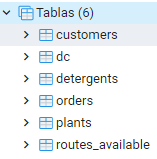


### Ahora sucede que nuestro codigo se quedo en la mitad y si intentamos hacerlo correr de nuevo, va a intentar generar nuevamente las tablas que si lograron cargarse bien, arrojando un nuevo error por intentar generar tablas duplicadas.

### Para corregir esto, podemos volver a ejecutar el codigo eliminando de la lista de nombres de tablas aquellas que si lograron cargarse bien (tambien quitar la que genera el problema)

### La otra opcion es agregar un comando antes de generar la tabla, para eliminarla en caso de que esta exista.

In [22]:
# Vamos a cambiar el nombre de la columna de la tabla que nos esta generando problemas ('routes_endtoend')
# imporat bibliotecas
import pandas as pd

# rescatemos el archivo
nombre = 'routes_endtoend'
ruta = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/{}.csv'.format(nombre)
archivo = pd.read_csv(ruta, sep = ';')
tabla = pd.DataFrame(archivo)

# ahora modifiquemos el nommbre de la columnas
tabla.columns = ['SegmentStart', 'SegmentEnd', 'EndToEndCostPerLiter']
columnas = list(tabla.columns)

# ahora si vamos a poder generar la tabla
comando_drop = 'drop table {}'.format(nombre)
comando = 'create table {}({} varchar(20), {} varchar(20), {} int)'.format(nombre, columnas[0], columnas[1], columnas[2]) 
#ejecutar(comando_drop)
ejecutar(comando)


## Listo, ya tenemos todas nuestras tablas generadas en la base de datos

## Lo que sigue es importar los datos de los archivos csv en estas.

### Para hacer esto debemos realizar los siguientes pasos desde la interfaz de PosgreSQL.


### 1) Seleccionar la tabla, ir a 'Herramientas' y seleccionar la opcion para importar.
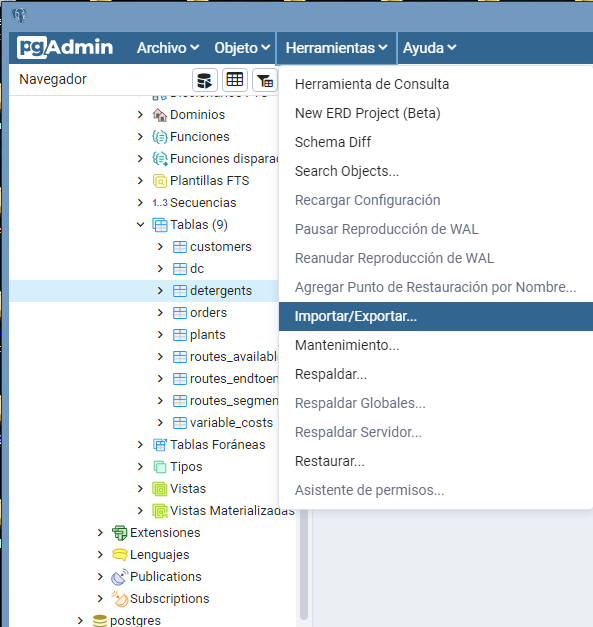

### 2) En esta ventana, fijarnos de habilitar la opción para importar, seleccionar el archivo correspondiente con la tabla que creamos y colocar en el delimitador por ';'
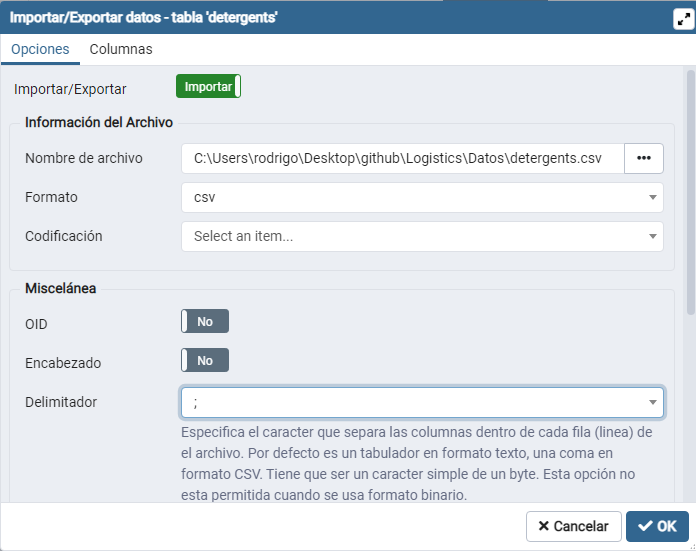


### En el proceso de importacion del archivo de 'detergents' me aparecio el siguiente error.

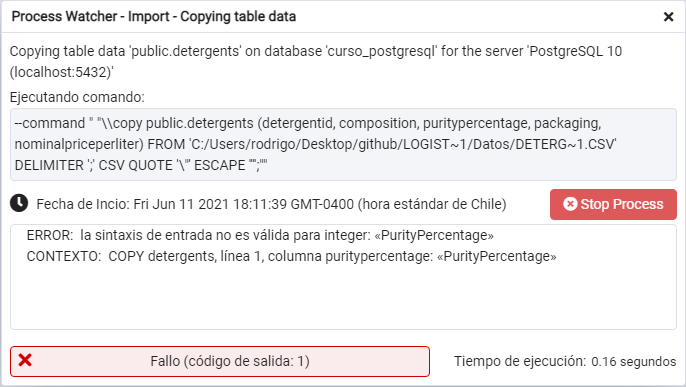

Este parece corresponder a que en la columna de 'puritypercentage' no le acomoda manejar tipos de datos int. vamos a ver como arreglarlo.




In [27]:
# al final termine cambiando el tipo de dato de int a varchar (despues corregiremos esto)
## y eliminando las filas nulas que tenia presente el archivo
import psycopg2
comando1 = 'alter table detergents alter column puritypercentage type varchar(20)'
ejecutar(comando1)
comando2 = 'alter table detergents alter column nominalpriceperliter type varchar(20)'
ejecutar(comando2)


### **Corregir esto mismo, para el siguiente cuadernillo**

### Adicionales (**Errores**)

**1) No funciona la contraseña de usuario**

Al iniciar PostgreSQL y luego de introducir las contraseñas de administrador y usuario, se me generó el siguiente problema, al intentar ingresar la contraseña de usuario de 'Postgre'
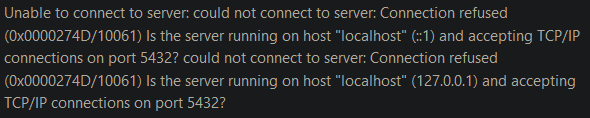

Para resolver esto tuve que reiniciar el servicio. Para esto hay que ir a 'panel de control' -> 'herramientas administrativas'
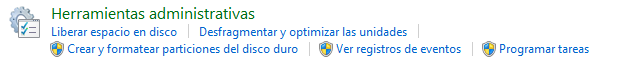

Luego seleccionar el acceso directo a 'servicios'
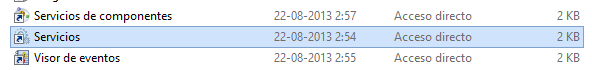

Luego buscar en 'postgresql-X64' y dar en reiniciar.
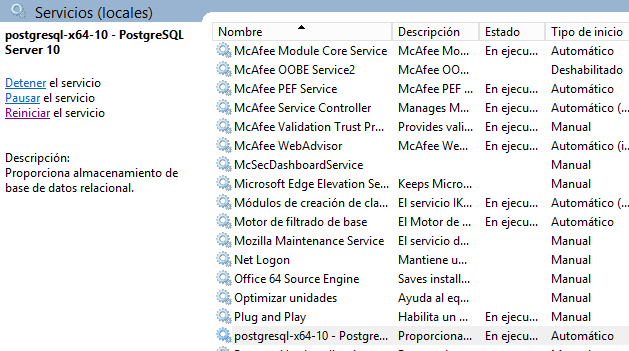

**2) No funciona la opcion para importar datos a las tablas**
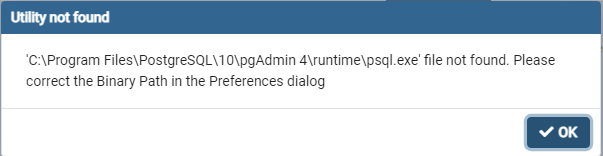

Para arreglar esto, debemos ir a 'Archivo' en 'Preferencias' y buscar en rutas. En la de Postgre colocar la direccion C:\Program Files\PostgreSQL\10\bin (**nota: buscar en el PC esta ruta, ya que generalmente se encuentra ahi**)
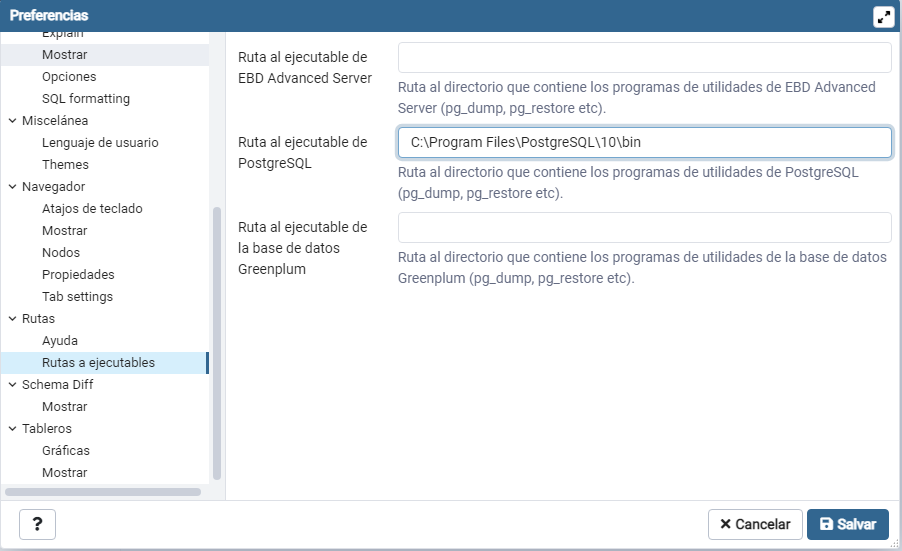




**3) Verificar los archivos csv, porque luego me di cuenta que tenian la siguiente estructura**
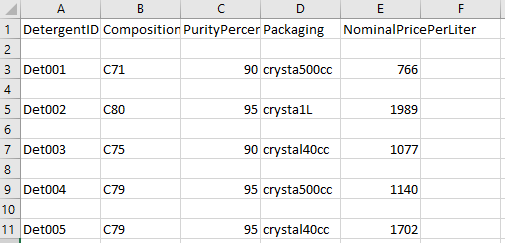

Sucedia que mirando los datos desde un dataframe, no era posible observar que en el archivo se encontraban filas con valores nulos.